In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
movie=pd.read_csv(r"C:\Users\User\Documents\movies.csv")
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [4]:
movie["titlele"]=le.fit_transform(movie.title)
movie["genresle"]=le.fit_transform(movie.genres)

In [5]:
movie1=movie.drop(['title','genres'], axis='columns')
movie1.head()

,movieId,titlele,genresle
0,1,31140,521
1,2,15619,618
2,3,12435,1119
3,4,32479,1059
4,5,10184,983


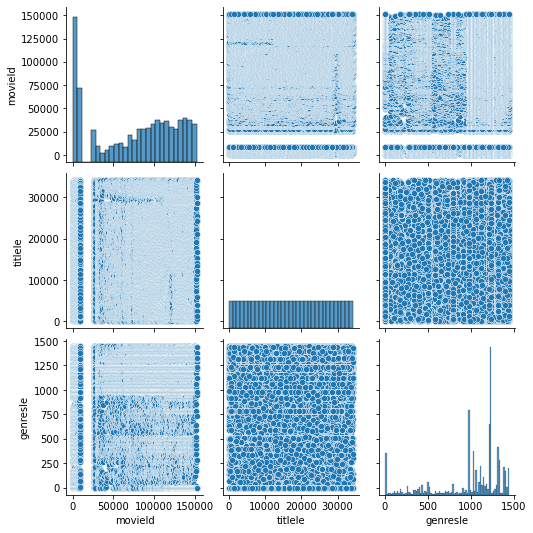

In [6]:
sns.pairplot(movie1)

{'whiskers': [<matplotlib.lines.Line2D at 0x19b4b28ab20>,
 'caps': [<matplotlib.lines.Line2D at 0x19b4b29b220>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b4b28a7c0>,
 'medians': [<matplotlib.lines.Line2D at 0x19b4b29b8e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19b4b29bc40>,
 'means': []}

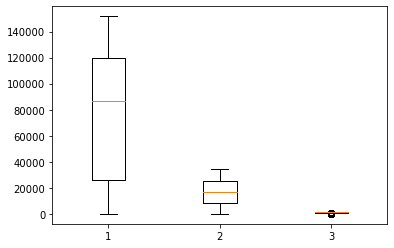

In [7]:
plt.boxplot(movie1)

In [8]:
Q1=movie1.titlele.quantile(0.25)
Q3=movie1.titlele.quantile(0.75)

IQR=Q3-Q1
print(IQR)
movie2=movie1[~((movie1.titlele<(Q1-1.5*IQR))|(movie1.titlele>(Q1+1.5*IQR)))]

17094.5


In [9]:
Q1=movie1.genresle.quantile(0.25)
Q3=movie1.genresle.quantile(0.75)
IQR=Q3-Q1
print(IQR)
movie2=movie1[~((movie1.genresle<(Q1-1.5*IQR))|(movie1.genresle>(Q1+1.5*IQR)))]

279.0


In [10]:
X=movie2[["movieId","titlele"]]
y=movie2["genresle"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,t=train_test_split(X,y,test_size=0.1)

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
reg1=RandomForestRegressor(n_estimators=20, random_state=0)
reg1.fit(X,y)
y_pred=reg1.predict(X)

In [13]:
reg1.score(X,y)

0.8271333684840636

In [14]:
reg1.predict(X)

array([ 790.  , 1024.15,  973.15, ..., 1226.5 , 1233.8 , 1250.65])

In [15]:
from sklearn import tree
from sklearn import  preprocessing
from sklearn.tree import DecisionTreeClassifier

In [16]:
model=tree.DecisionTreeClassifier()

In [17]:
model.fit(X,y)

DecisionTreeClassifier()

In [18]:
model.score(X,y)

1.0